In [535]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [536]:
df=pd.read_csv('algerian_forest_fires.csv')

In [537]:
df.head()## for dependent feature for regression statement is fwi
## for  dependent feature fro classfication problem statement is fire occurrence


,Date,Region,Temperature (°C),Humidity (%),Wind Speed (km/h),Rain (mm),FFMC,DMC,DC,ISI,BUI,FWI,Fire Occurrence
0,2023-06-09,Bejaia,35.5,66,15.7,0.1,92.5,54.6,273.9,17.6,54.3,34.1,No
1,2023-07-15,Bejaia,31.9,31,12.5,1.4,85.5,55.6,239.3,8.5,47.6,15.7,No
2,2023-06-19,Bejaia,38.2,55,18.8,4.1,84.4,33.2,202.9,8.8,77.7,18.2,No
3,2023-06-27,Sidi Bel-Abbes,37.5,37,10.0,3.6,90.0,52.4,166.0,9.5,62.5,37.1,Yes
4,2023-09-02,Bejaia,31.1,73,15.9,2.7,83.0,59.8,188.1,9.1,56.6,13.8,No


In [538]:
df['Year']=df['Date'].str.split('-').str[0]
df['month']=df['Date'].str.split('-').str[1]
df['day']=df['Date'].str.split('-').str[2]

In [539]:
df.drop('Date',inplace=True,axis=1)

In [540]:
df.head()

,Region,Temperature (°C),Humidity (%),Wind Speed (km/h),Rain (mm),FFMC,DMC,DC,ISI,BUI,FWI,Fire Occurrence,Year,month,day
0,Bejaia,35.5,66,15.7,0.1,92.5,54.6,273.9,17.6,54.3,34.1,No,2023,06,09
1,Bejaia,31.9,31,12.5,1.4,85.5,55.6,239.3,8.5,47.6,15.7,No,2023,07,15
2,Bejaia,38.2,55,18.8,4.1,84.4,33.2,202.9,8.8,77.7,18.2,No,2023,06,19
3,Sidi Bel-Abbes,37.5,37,10.0,3.6,90.0,52.4,166.0,9.5,62.5,37.1,Yes,2023,06,27
4,Bejaia,31.1,73,15.9,2.7,83.0,59.8,188.1,9.1,56.6,13.8,No,2023,09,02


In [541]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Region             200 non-null    object 
 1   Temperature (°C)   200 non-null    float64
 2   Humidity (%)       200 non-null    int64  
 3   Wind Speed (km/h)  200 non-null    float64
 4   Rain (mm)          200 non-null    float64
 5   FFMC               200 non-null    float64
 6   DMC                200 non-null    float64
 7   DC                 200 non-null    float64
 8   ISI                200 non-null    float64
 9   BUI                200 non-null    float64
 10  FWI                200 non-null    float64
 11  Fire Occurrence    200 non-null    object 
 12  Year               200 non-null    object 
 13  month              200 non-null    object 
 14  day                200 non-null    object 
dtypes: float64(9), int64(1), object(5)
memory usage: 23.6+ KB


In [542]:
df.isnull().sum()

Region               0
Temperature (°C)     0
Humidity (%)         0
Wind Speed (km/h)    0
Rain (mm)            0
FFMC                 0
DMC                  0
DC                   0
ISI                  0
BUI                  0
FWI                  0
Fire Occurrence      0
Year                 0
month                0
day                  0
dtype: int64

In [543]:
df.head()

,Region,Temperature (°C),Humidity (%),Wind Speed (km/h),Rain (mm),FFMC,DMC,DC,ISI,BUI,FWI,Fire Occurrence,Year,month,day
0,Bejaia,35.5,66,15.7,0.1,92.5,54.6,273.9,17.6,54.3,34.1,No,2023,06,09
1,Bejaia,31.9,31,12.5,1.4,85.5,55.6,239.3,8.5,47.6,15.7,No,2023,07,15
2,Bejaia,38.2,55,18.8,4.1,84.4,33.2,202.9,8.8,77.7,18.2,No,2023,06,19
3,Sidi Bel-Abbes,37.5,37,10.0,3.6,90.0,52.4,166.0,9.5,62.5,37.1,Yes,2023,06,27
4,Bejaia,31.1,73,15.9,2.7,83.0,59.8,188.1,9.1,56.6,13.8,No,2023,09,02


In [544]:
df['Year']=df['Year'].astype(int)
df['month']=df['month'].astype(int)
df['day']=df['day'].astype(int)



In [545]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
encoded=encoder.fit_transform(df[['Region']]).toarray()

In [546]:
encoded_df=pd.DataFrame(encoded,columns=encoder.get_feature_names_out())

In [547]:
df=pd.concat([df,encoded_df],axis=1)

In [548]:
df.head()

,Region,Temperature (°C),Humidity (%),Wind Speed (km/h),Rain (mm),FFMC,DMC,DC,ISI,BUI,FWI,Fire Occurrence,Year,month,day,Region_Bejaia,Region_Sidi Bel-Abbes
0,Bejaia,35.5,66,15.7,0.1,92.5,54.6,273.9,17.6,54.3,34.1,No,2023,6,9,1.0,0.0
1,Bejaia,31.9,31,12.5,1.4,85.5,55.6,239.3,8.5,47.6,15.7,No,2023,7,15,1.0,0.0
2,Bejaia,38.2,55,18.8,4.1,84.4,33.2,202.9,8.8,77.7,18.2,No,2023,6,19,1.0,0.0
3,Sidi Bel-Abbes,37.5,37,10.0,3.6,90.0,52.4,166.0,9.5,62.5,37.1,Yes,2023,6,27,0.0,1.0
4,Bejaia,31.1,73,15.9,2.7,83.0,59.8,188.1,9.1,56.6,13.8,No,2023,9,2,1.0,0.0


In [549]:
df.isnull().sum()

Region                   0
Temperature (°C)         0
Humidity (%)             0
Wind Speed (km/h)        0
Rain (mm)                0
FFMC                     0
DMC                      0
DC                       0
ISI                      0
BUI                      0
FWI                      0
Fire Occurrence          0
Year                     0
month                    0
day                      0
Region_Bejaia            0
Region_Sidi Bel-Abbes    0
dtype: int64

In [550]:
##by label encoding 
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [551]:
encoded=encoder.fit_transform(df['Fire Occurrence'])

In [552]:
encoded_df=pd.DataFrame(encoded,columns=['FIRE OCCURRENCE'])

In [553]:
df=pd.concat([df,encoded_df],axis=1)

In [554]:
df.head()

,Region,Temperature (°C),Humidity (%),Wind Speed (km/h),Rain (mm),FFMC,DMC,DC,ISI,BUI,FWI,Fire Occurrence,Year,month,day,Region_Bejaia,Region_Sidi Bel-Abbes,FIRE OCCURRENCE
0,Bejaia,35.5,66,15.7,0.1,92.5,54.6,273.9,17.6,54.3,34.1,No,2023,6,9,1.0,0.0,0
1,Bejaia,31.9,31,12.5,1.4,85.5,55.6,239.3,8.5,47.6,15.7,No,2023,7,15,1.0,0.0,0
2,Bejaia,38.2,55,18.8,4.1,84.4,33.2,202.9,8.8,77.7,18.2,No,2023,6,19,1.0,0.0,0
3,Sidi Bel-Abbes,37.5,37,10.0,3.6,90.0,52.4,166.0,9.5,62.5,37.1,Yes,2023,6,27,0.0,1.0,1
4,Bejaia,31.1,73,15.9,2.7,83.0,59.8,188.1,9.1,56.6,13.8,No,2023,9,2,1.0,0.0,0


In [555]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Region                 200 non-null    object 
 1   Temperature (°C)       200 non-null    float64
 2   Humidity (%)           200 non-null    int64  
 3   Wind Speed (km/h)      200 non-null    float64
 4   Rain (mm)              200 non-null    float64
 5   FFMC                   200 non-null    float64
 6   DMC                    200 non-null    float64
 7   DC                     200 non-null    float64
 8   ISI                    200 non-null    float64
 9   BUI                    200 non-null    float64
 10  FWI                    200 non-null    float64
 11  Fire Occurrence        200 non-null    object 
 12  Year                   200 non-null    int32  
 13  month                  200 non-null    int32  
 14  day                    200 non-null    int32  
 15  Region

In [556]:
df.drop('Fire Occurrence',inplace=True,axis=1)
df.drop('Region',inplace=True,axis=1)


In [557]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Temperature (°C)       200 non-null    float64
 1   Humidity (%)           200 non-null    int64  
 2   Wind Speed (km/h)      200 non-null    float64
 3   Rain (mm)              200 non-null    float64
 4   FFMC                   200 non-null    float64
 5   DMC                    200 non-null    float64
 6   DC                     200 non-null    float64
 7   ISI                    200 non-null    float64
 8   BUI                    200 non-null    float64
 9   FWI                    200 non-null    float64
 10  Year                   200 non-null    int32  
 11  month                  200 non-null    int32  
 12  day                    200 non-null    int32  
 13  Region_Bejaia          200 non-null    float64
 14  Region_Sidi Bel-Abbes  200 non-null    float64
 15  FIRE O

In [558]:
df.head()

,Temperature (°C),Humidity (%),Wind Speed (km/h),Rain (mm),FFMC,DMC,DC,ISI,BUI,FWI,Year,month,day,Region_Bejaia,Region_Sidi Bel-Abbes,FIRE OCCURRENCE
0,35.5,66,15.7,0.1,92.5,54.6,273.9,17.6,54.3,34.1,2023,6,9,1.0,0.0,0
1,31.9,31,12.5,1.4,85.5,55.6,239.3,8.5,47.6,15.7,2023,7,15,1.0,0.0,0
2,38.2,55,18.8,4.1,84.4,33.2,202.9,8.8,77.7,18.2,2023,6,19,1.0,0.0,0
3,37.5,37,10.0,3.6,90.0,52.4,166.0,9.5,62.5,37.1,2023,6,27,0.0,1.0,1
4,31.1,73,15.9,2.7,83.0,59.8,188.1,9.1,56.6,13.8,2023,9,2,1.0,0.0,0


In [559]:
df.to_csv('algerian_forest_fires_cleaned.csv',index=False)

In [560]:
##exploitary data analysis
df_copy=df.drop(['day','month','Year'],axis=1)

In [561]:
df_copy.head()

,Temperature (°C),Humidity (%),Wind Speed (km/h),Rain (mm),FFMC,DMC,DC,ISI,BUI,FWI,Region_Bejaia,Region_Sidi Bel-Abbes,FIRE OCCURRENCE
0,35.5,66,15.7,0.1,92.5,54.6,273.9,17.6,54.3,34.1,1.0,0.0,0
1,31.9,31,12.5,1.4,85.5,55.6,239.3,8.5,47.6,15.7,1.0,0.0,0
2,38.2,55,18.8,4.1,84.4,33.2,202.9,8.8,77.7,18.2,1.0,0.0,0
3,37.5,37,10.0,3.6,90.0,52.4,166.0,9.5,62.5,37.1,0.0,1.0,1
4,31.1,73,15.9,2.7,83.0,59.8,188.1,9.1,56.6,13.8,1.0,0.0,0


In [562]:
df_copy['FIRE OCCURRENCE'].unique()

array([0, 1])

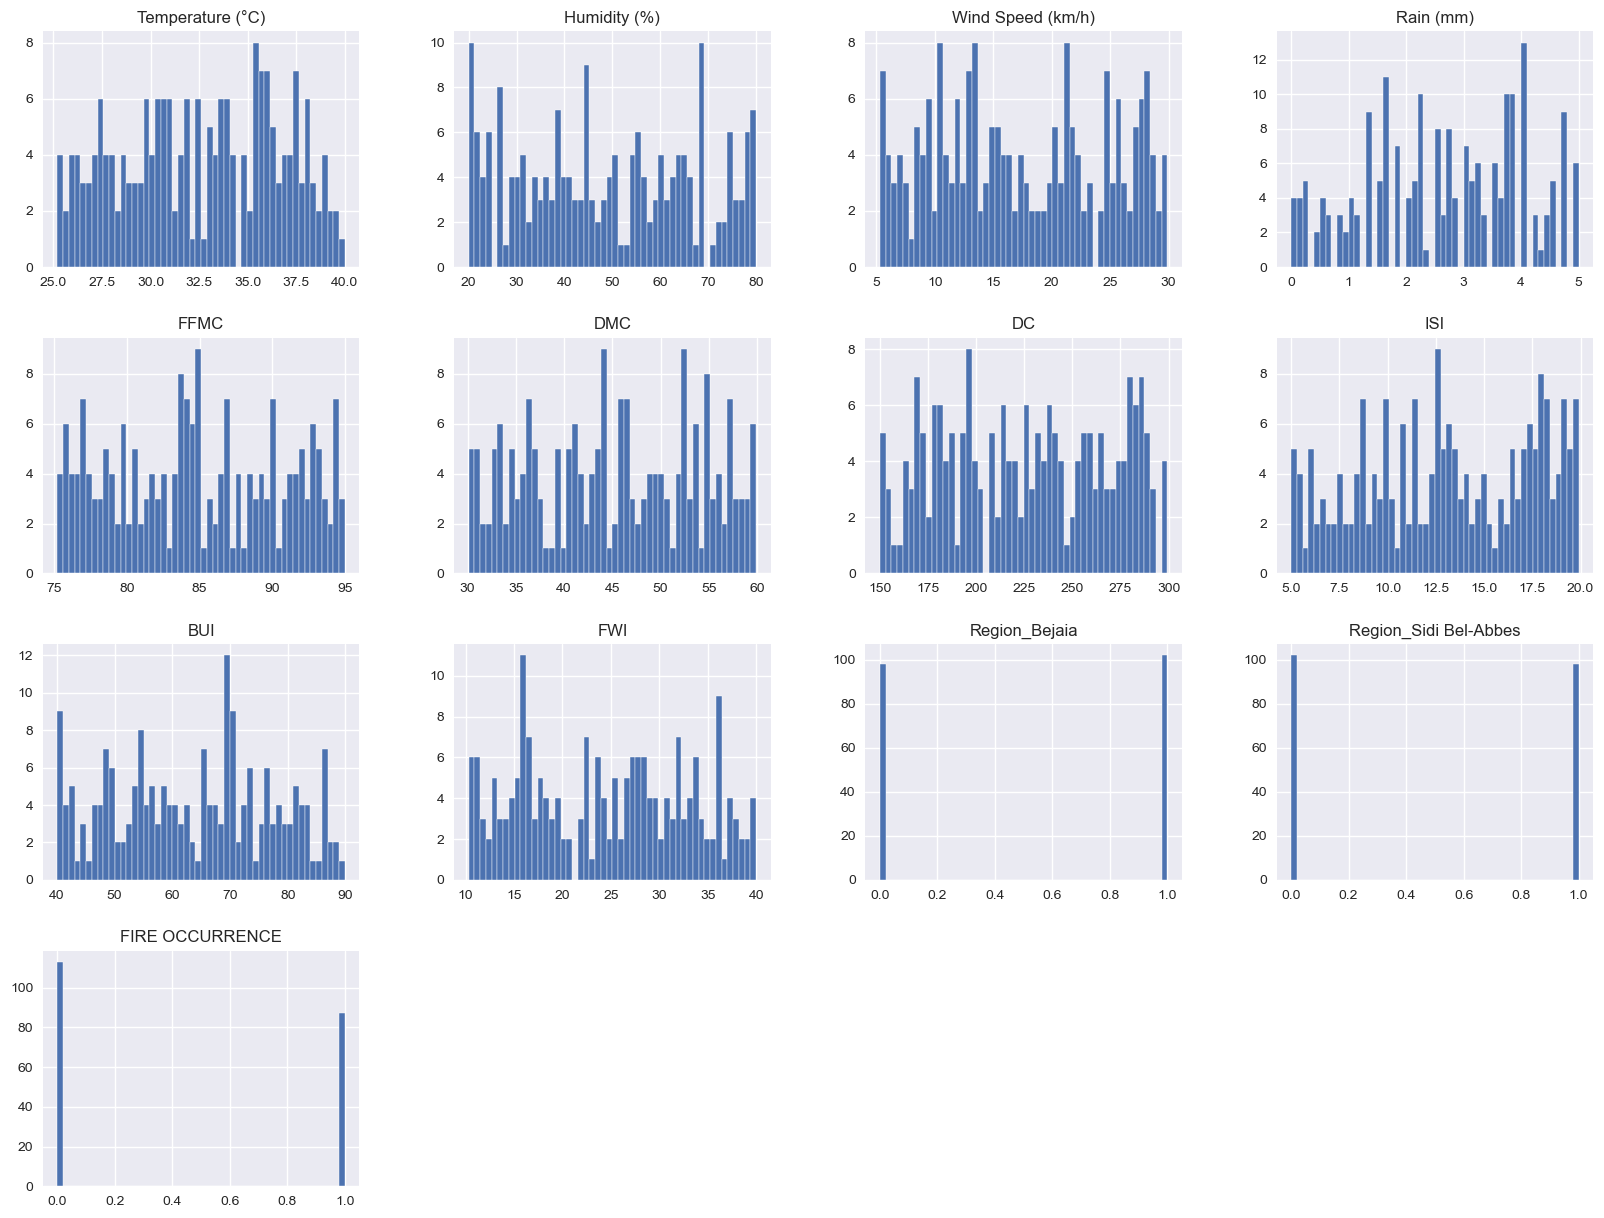

In [563]:
##plot density of all the features
plt.style.use('seaborn-v0_8')
df_copy.hist(bins=50,figsize=(20,15))
plt.show()

<Axes: ylabel='count'>

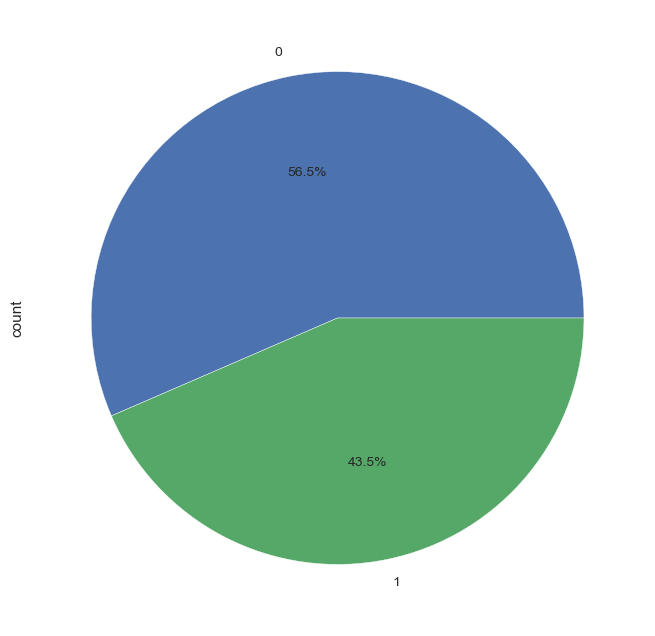

In [564]:
##fire occurence in pie chart form
df_copy['FIRE OCCURRENCE'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(8, 8))


<Axes: >

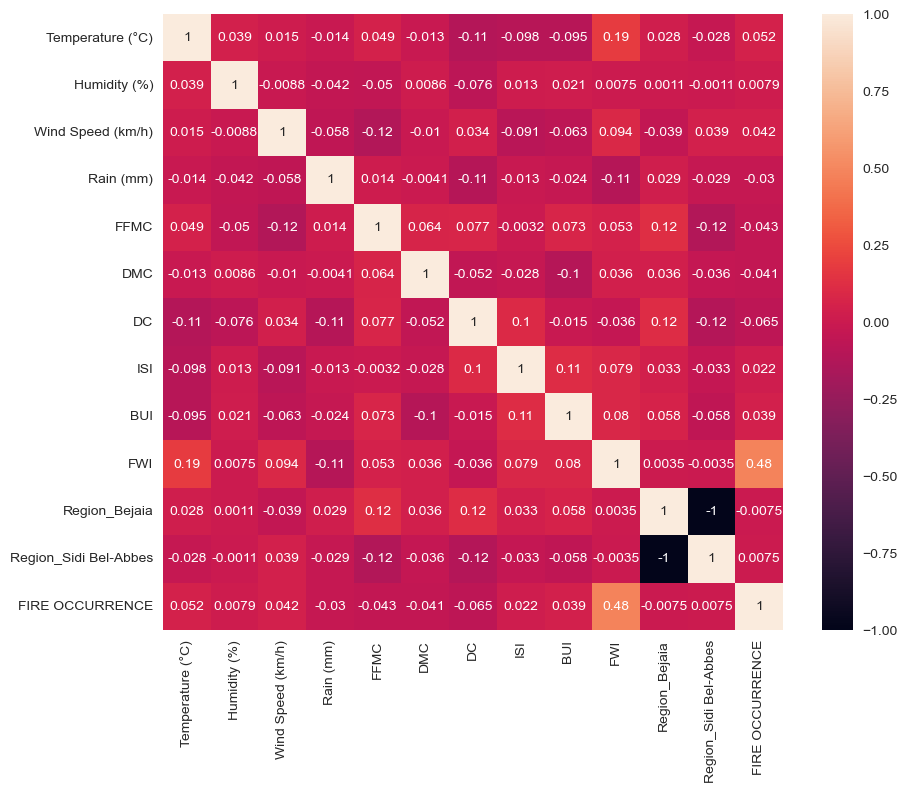

In [565]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_copy.corr(),annot=True)

<Axes: ylabel='BUI'>

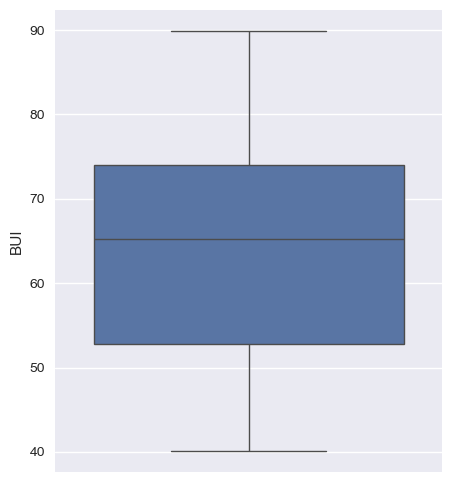

In [566]:
plt.figure(figsize=(5, 6))
sns.boxplot(df['BUI'])

<Axes: ylabel='Humidity (%)'>

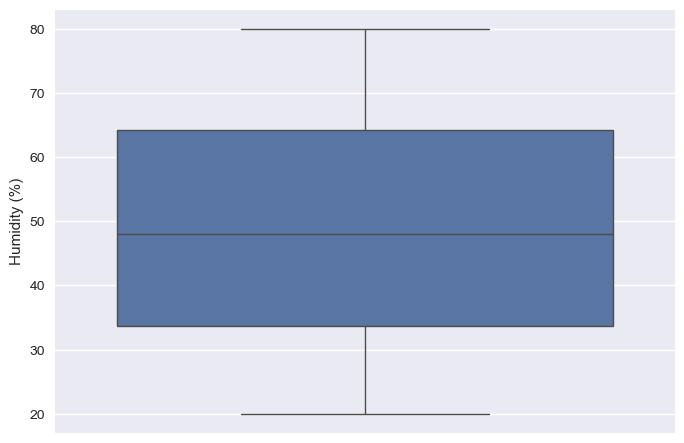

In [567]:
sns.boxplot(df['Humidity (%)'])

<Axes: xlabel='month', ylabel='count'>

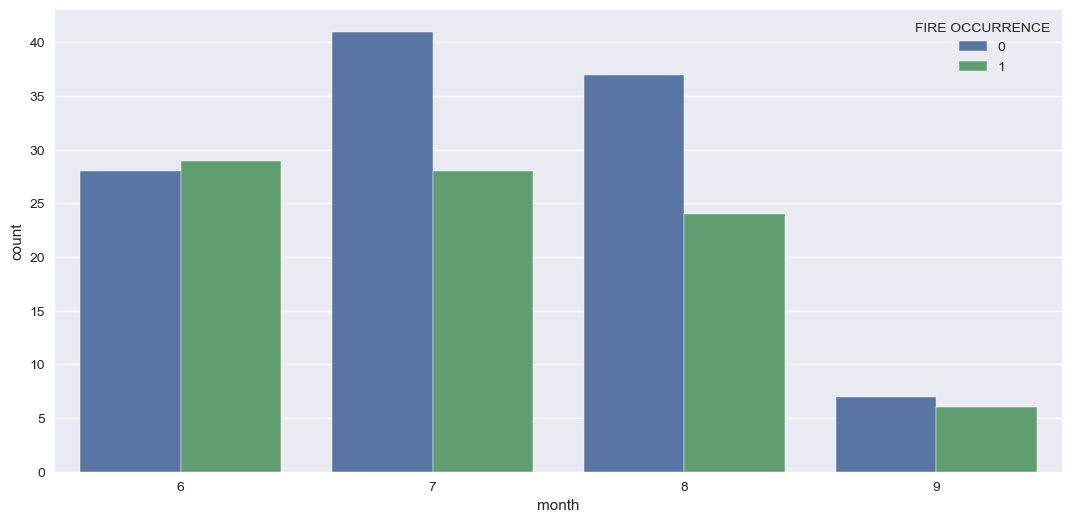

In [568]:
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='FIRE OCCURRENCE',data=df)

In [569]:
dfs=pd.read_csv('algerian_forest_fires_cleaned.csv')

In [570]:
dfs.head()
dfs.drop(['Year','month','day'],inplace=True,axis=1)

In [571]:
dfs.columns

Index(['Temperature (°C)', 'Humidity (%)', 'Wind Speed (km/h)', 'Rain (mm)',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Region_Bejaia',
       'Region_Sidi Bel-Abbes', 'FIRE OCCURRENCE'],
      dtype='object')

In [572]:
dfs.tail()

,Temperature (°C),Humidity (%),Wind Speed (km/h),Rain (mm),FFMC,DMC,DC,ISI,BUI,FWI,Region_Bejaia,Region_Sidi Bel-Abbes,FIRE OCCURRENCE
195,36.6,35,6.0,5.0,89.4,30.4,176.5,7.3,47.0,22.2,1.0,0.0,0
196,38.8,60,17.2,3.4,80.8,44.2,173.3,10.1,53.4,16.3,0.0,1.0,0
197,30.4,40,7.3,0.2,76.9,49.0,264.1,13.0,69.6,38.0,0.0,1.0,1
198,27.1,63,9.1,2.6,83.9,46.4,195.2,12.7,66.1,26.4,0.0,1.0,1
199,29.7,45,23.5,1.8,82.0,52.7,177.5,7.4,81.7,26.4,1.0,0.0,1


In [573]:
##linear regression
X=dfs.drop('FWI',axis=1)
y=dfs['FWI']

In [574]:
X

,Temperature (°C),Humidity (%),Wind Speed (km/h),Rain (mm),FFMC,DMC,DC,ISI,BUI,Region_Bejaia,Region_Sidi Bel-Abbes,FIRE OCCURRENCE
0,35.5,66,15.7,0.1,92.5,54.6,273.9,17.6,54.3,1.0,0.0,0
1,31.9,31,12.5,1.4,85.5,55.6,239.3,8.5,47.6,1.0,0.0,0
2,38.2,55,18.8,4.1,84.4,33.2,202.9,8.8,77.7,1.0,0.0,0
3,37.5,37,10.0,3.6,90.0,52.4,166.0,9.5,62.5,0.0,1.0,1
4,31.1,73,15.9,2.7,83.0,59.8,188.1,9.1,56.6,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
195,36.6,35,6.0,5.0,89.4,30.4,176.5,7.3,47.0,1.0,0.0,0
196,38.8,60,17.2,3.4,80.8,44.2,173.3,10.1,53.4,0.0,1.0,0
197,30.4,40,7.3,0.2,76.9,49.0,264.1,13.0,69.6,0.0,1.0,1
198,27.1,63,9.1,2.6,83.9,46.4,195.2,12.7,66.1,0.0,1.0,1


In [575]:
y

0      34.1
1      15.7
2      18.2
3      37.1
4      13.8
       ... 
195    22.2
196    16.3
197    38.0
198    26.4
199    26.4
Name: FWI, Length: 200, dtype: float64

In [576]:
##train test spilit
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [577]:
X_train

,Temperature (°C),Humidity (%),Wind Speed (km/h),Rain (mm),FFMC,DMC,DC,ISI,BUI,Region_Bejaia,Region_Sidi Bel-Abbes,FIRE OCCURRENCE
79,29.9,28,28.9,1.3,94.0,34.6,285.5,18.3,70.8,0.0,1.0,0
197,30.4,40,7.3,0.2,76.9,49.0,264.1,13.0,69.6,0.0,1.0,1
38,28.6,24,8.7,1.6,79.9,53.5,291.7,18.0,72.2,0.0,1.0,0
24,30.8,75,19.3,2.9,83.7,40.7,188.9,7.8,63.3,0.0,1.0,0
122,25.3,79,10.7,3.7,82.4,44.3,259.7,14.0,59.2,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
106,31.8,66,21.7,2.2,83.7,36.5,265.5,11.7,48.2,1.0,0.0,0
14,29.1,29,19.9,3.8,78.2,41.2,197.4,12.6,69.0,1.0,0.0,0
92,29.8,76,16.2,3.0,78.7,50.2,164.1,13.3,54.1,0.0,1.0,1
179,29.1,23,19.7,0.2,89.1,30.6,276.8,19.6,66.6,0.0,1.0,0


<Axes: >

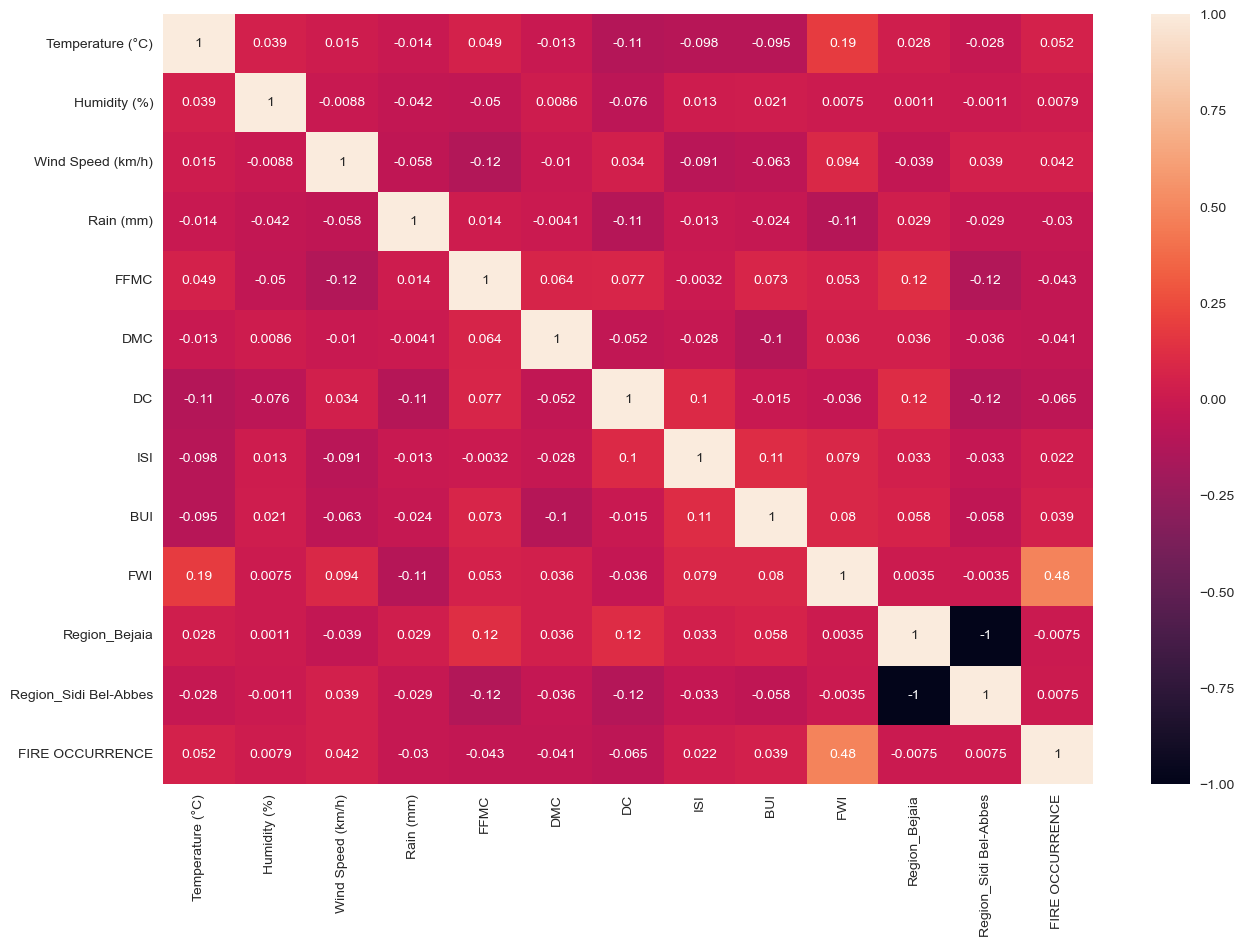

In [578]:
plt.figure(figsize=(15,10))
sns.heatmap(dfs.corr(),annot=True)

In [579]:
dfs.head()

,Temperature (°C),Humidity (%),Wind Speed (km/h),Rain (mm),FFMC,DMC,DC,ISI,BUI,FWI,Region_Bejaia,Region_Sidi Bel-Abbes,FIRE OCCURRENCE
0,35.5,66,15.7,0.1,92.5,54.6,273.9,17.6,54.3,34.1,1.0,0.0,0
1,31.9,31,12.5,1.4,85.5,55.6,239.3,8.5,47.6,15.7,1.0,0.0,0
2,38.2,55,18.8,4.1,84.4,33.2,202.9,8.8,77.7,18.2,1.0,0.0,0
3,37.5,37,10.0,3.6,90.0,52.4,166.0,9.5,62.5,37.1,0.0,1.0,1
4,31.1,73,15.9,2.7,83.0,59.8,188.1,9.1,56.6,13.8,1.0,0.0,0


In [580]:
##for multicollinearity in dataset so as to remove that columns
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return colname            

In [581]:
corr_features=correlation(X_train,0.05)

In [582]:
X_train.drop(corr_features,inplace=True,axis=1)
X_test.drop(corr_features,inplace=True,axis=1)

In [583]:
X_train

,Temperature (°C),Humidity (%),Wind Speed (km/h),Rain (mm),FFMC,DMC,DC,ISI,BUI,Region_Bejaia,Region_Sidi Bel-Abbes
79,29.9,28,28.9,1.3,94.0,34.6,285.5,18.3,70.8,0.0,1.0
197,30.4,40,7.3,0.2,76.9,49.0,264.1,13.0,69.6,0.0,1.0
38,28.6,24,8.7,1.6,79.9,53.5,291.7,18.0,72.2,0.0,1.0
24,30.8,75,19.3,2.9,83.7,40.7,188.9,7.8,63.3,0.0,1.0
122,25.3,79,10.7,3.7,82.4,44.3,259.7,14.0,59.2,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
106,31.8,66,21.7,2.2,83.7,36.5,265.5,11.7,48.2,1.0,0.0
14,29.1,29,19.9,3.8,78.2,41.2,197.4,12.6,69.0,1.0,0.0
92,29.8,76,16.2,3.0,78.7,50.2,164.1,13.3,54.1,0.0,1.0
179,29.1,23,19.7,0.2,89.1,30.6,276.8,19.6,66.6,0.0,1.0


In [584]:
X_train.shape

(160, 11)

In [585]:
X_test.shape

(40, 11)

In [586]:
##standardisation
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [587]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

<Axes: >

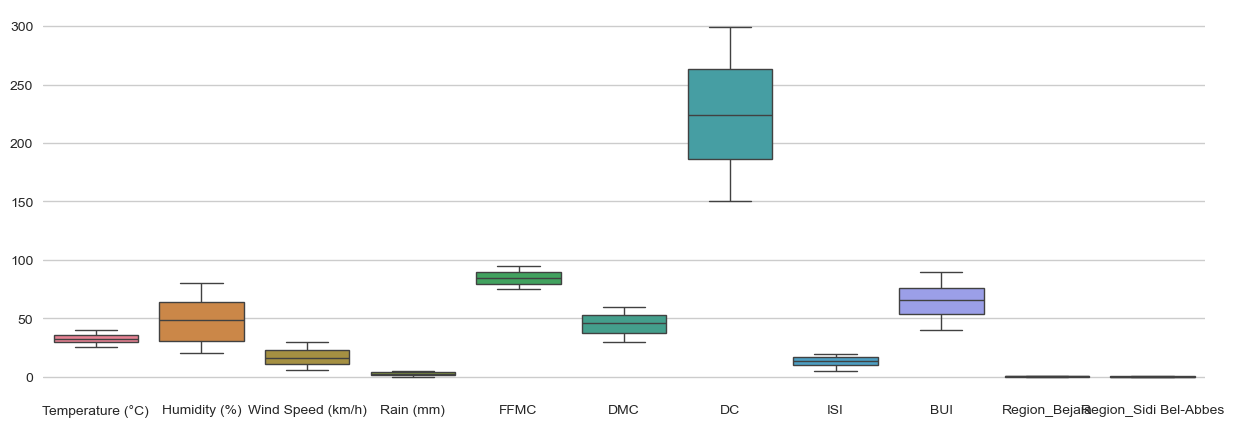

In [588]:
plt.figure(figsize=(15,5))
sns.boxplot(X_train)## here we clearly seen the columns are differ from each other before scaling

<Axes: >

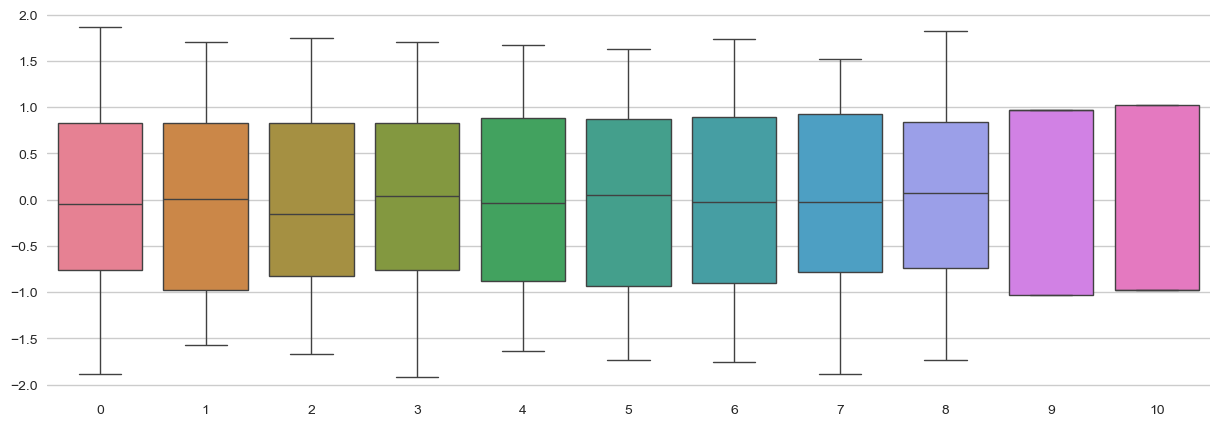

In [589]:
plt.figure(figsize=(15,5))
sns.boxplot(X_train_scaled)##after scaling

In [590]:
##linear regression model
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()

In [591]:
linreg.fit(X_train_scaled,y_train)


LinearRegression()

In [592]:
y_pred=linreg.predict(X_test_scaled)

In [593]:
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
score=r2_score(y_test,y_pred)
adjusted_score=1-(1-score)*(len(y_test)-1)/(len(y_test)-1-X_test_scaled.shape[1])
print(mae)
print(mse)
print(rmse)
print(score)
print(adjusted_score)



7.999966609223156
81.45354041651312
9.025161517475082
-0.013406561058987077
-0.41153056718930325


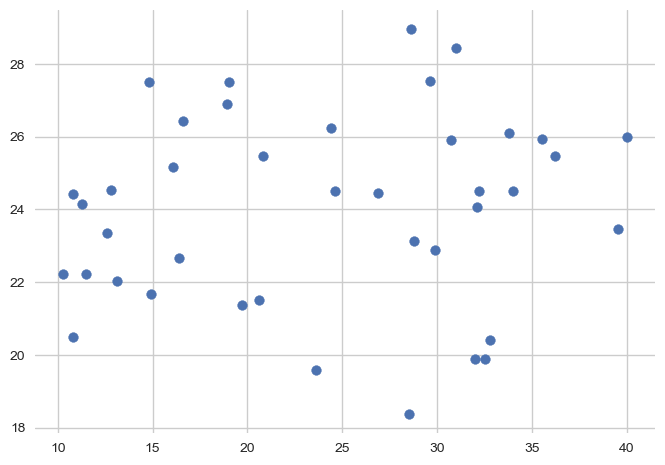

In [594]:
plt.scatter(y_test,y_pred)

In [595]:
residuals=y_test-y_pred

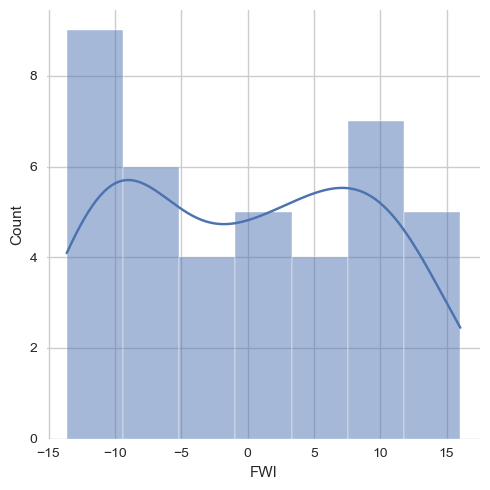

In [596]:
sns.displot(residuals,kde=True)

In [597]:
##Lasso regression
from sklearn.linear_model import Lasso
lass=Lasso()
lass.fit(X_train_scaled,y_train)
y_pred_lass=lass.predict(X_test_scaled)
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score
mae=mean_absolute_error(y_test,y_pred_lass)
mse=mean_squared_error(y_test,y_pred_lass)
rmse=np.sqrt(mse)
score=r2_score(y_test,y_pred_lass)
adjusted_score=1-(1-score)*(len(y_test)-1)/(len(y_test)-1-X_test_scaled.shape[1])
print(mae)
print(mse)
print(rmse)
print(score)
print(adjusted_score)




7.977926936041641
79.53451710495371
8.918212663137929
0.010469022553646123
-0.3782752900145643


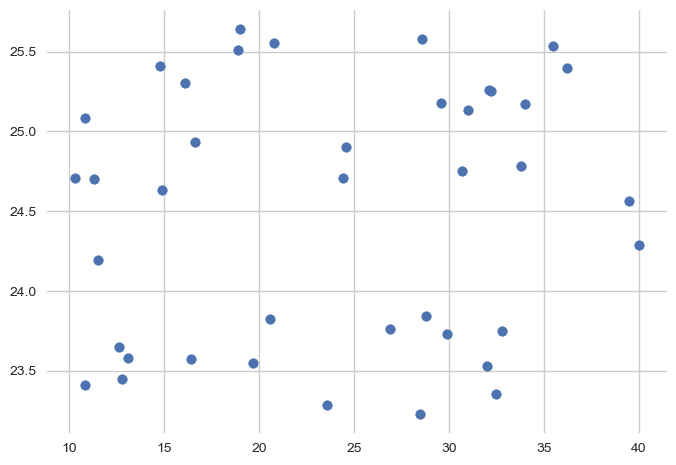

In [598]:
plt.scatter(y_test,y_pred_lass)

In [ ]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred_ridge=ridge.predict(X_test_scaled)
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score
mae=mean_absolute_error(y_test,y_pred_ridge)
mse=mean_squared_error(y_test,y_pred_ridge)
rmse=np.sqrt(mse)
score=r2_score(y_test,y_pred_ridge)
adjusted_score=1-(1-score)*(len(y_test)-1)/(len(y_test)-1-X_test_scaled.shape[1])
print(mae)
print(mse)
print(rmse)
print(score)
print(adjusted_score)




7.998561738016313
81.40071044157169
9.022234226707468
-0.012749275409370542
-0.41061506217733745


In [600]:
from sklearn.linear_model import ElasticNet
net=ElasticNet()
net.fit(X_train_scaled,y_train)
y_pred_net=net.predict(X_test_scaled)
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score
mae=mean_absolute_error(y_test,y_pred_net)
mse=mean_squared_error(y_test,y_pred_net)
rmse=np.sqrt(mse)
score=r2_score(y_test,y_pred_net)
adjusted_score=1-(1-score)*(len(y_test)-1)/(len(y_test)-1-X_test_scaled.shape[1])
print(mae)
print(mse)
print(rmse)
print(score)
print(adjusted_score)


7.994210550673621
79.52134158238657
8.91747394626901
0.010632946195843096
-0.3780469677986471


In [601]:
### from here we conclude that this dataset is randomised so linear model give poor accuracy

In [603]:
import statsmodels.api as sm
model=sm.OLS(y_train,X_train_scaled).fit()

In [604]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                    FWI   R-squared (uncentered):                   0.009
Model:                            OLS   Adj. R-squared (uncentered):             -0.057
Method:                 Least Squares   F-statistic:                             0.1336
Date:                Sun, 09 Mar 2025   Prob (F-statistic):                       0.999
Time:                        09:56:45   Log-Likelihood:                         -747.70
No. Observations:                 160   AIC:                                      1515.
Df Residuals:                     150   BIC:                                      1546.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [606]:
##lassso cv
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)

In [607]:
lassocv.fit(X_train_scaled,y_train)

LassoCV(cv=5)

In [609]:
lassocv.predict(X_test_scaled)

array([25.27726952, 23.50542528, 23.83400799, 25.14658572, 24.85620596,
       25.57341177, 23.37666503, 23.6543056 , 23.62161679, 25.49433726,
       23.83952213, 25.44539658, 23.51665972, 23.3650897 , 25.08221614,
       25.21822254, 24.72824758, 24.64204056, 24.80743572, 25.1813539 ,
       23.75262685, 24.26058569, 24.724756  , 23.7850884 , 25.52178138,
       23.45337609, 25.38832996, 25.2140849 , 23.91735486, 24.66044323,
       24.29806467, 23.66204845, 24.68968265, 23.74339387, 25.0974535 ,
       23.61118422, 24.89726906, 25.52214337, 24.61180772, 25.38827315])

In [610]:
lassocv.alpha_

1.0383274823257385

In [611]:
lassocv.alphas_

array([1.69221508, 1.57816545, 1.47180238, 1.37260782, 1.28009865,
       1.19382429, 1.11336453, 1.03832748, 0.96834769, 0.90308429,
       0.84221943, 0.78545666, 0.73251951, 0.68315015, 0.63710812,
       0.59416916, 0.55412415, 0.51677803, 0.48194892, 0.44946718,
       0.4191746 , 0.39092363, 0.36457669, 0.34000544, 0.31709021,
       0.29571939, 0.27578889, 0.25720165, 0.23986712, 0.22370087,
       0.20862418, 0.19456361, 0.18145068, 0.16922151, 0.15781654,
       0.14718024, 0.13726078, 0.12800987, 0.11938243, 0.11133645,
       0.10383275, 0.09683477, 0.09030843, 0.08422194, 0.07854567,
       0.07325195, 0.06831501, 0.06371081, 0.05941692, 0.05541241,
       0.0516778 , 0.04819489, 0.04494672, 0.04191746, 0.03909236,
       0.03645767, 0.03400054, 0.03170902, 0.02957194, 0.02757889,
       0.02572016, 0.02398671, 0.02237009, 0.02086242, 0.01945636,
       0.01814507, 0.01692215, 0.01578165, 0.01471802, 0.01372608,
       0.01280099, 0.01193824, 0.01113365, 0.01038327, 0.00968

In [ ]:
lassocv.mse_path_ ## from here we conclude poor model permofance as we know if mse_path_ is high low the perfermamce become low

array([[67.78870667, 88.14032776, 62.96397206, 72.33259462, 66.21437437],
       [67.78870667, 88.14032776, 63.06823703, 72.14284975, 65.87330972],
       [67.78870667, 88.14032776, 63.19399507, 72.23008947, 65.57903828],
       [67.67931827, 87.71099579, 63.33608284, 72.48384453, 65.3253055 ],
       [67.12341489, 87.24557684, 63.49016884, 72.74555427, 65.10668227],
       [66.57343458, 86.82484418, 63.83376764, 73.01141876, 64.91845665],
       [66.16650745, 86.34959173, 64.20356018, 73.25694967, 64.80608448],
       [65.85484915, 85.90061685, 64.58306373, 73.34052162, 64.75750897],
       [65.8013894 , 85.49844452, 65.13299414, 73.45416706, 64.68393186],
       [65.81235146, 85.13776567, 65.57432539, 73.59120964, 64.62454875],
       [65.87547268, 84.81390967, 65.96560345, 73.74602734, 64.58338572],
       [65.98034769, 84.52276479, 66.37015685, 73.84098485, 64.55736298],
       [66.11816985, 84.26070872, 66.78193037, 73.92935694, 64.54384946],
       [66.28150658, 84.02454793, 67.1